In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [38]:
import numpy as np
import pandas as pd

expected_cols_for_images = 100 * 100 * 3
def load_data_robustly(filename, delimiter, expected_cols):
    try:
        return np.loadtxt(filename, delimiter=delimiter)
    except ValueError as e:
        if "number of columns changed" in str(e):
            print(f"Warning: '{filename}' has inconsistent column counts. Attempting to load with pandas.")
            df = pd.read_csv(filename, delimiter=delimiter, header=None)
            data_array = df.apply(pd.to_numeric, errors='coerce').fillna(0).values
            if data_array.shape[1] < expected_cols:
                print(f"Info: '{filename}' loaded with {data_array.shape[1]} columns. Padding to {expected_cols} columns.")
                padded_array = np.zeros((data_array.shape[0], expected_cols))
                padded_array[:, :data_array.shape[1]] = data_array
                return padded_array
            elif data_array.shape[1] > expected_cols:
                print(f"Warning: '{filename}' loaded with {data_array.shape[1]} columns. Truncating to {expected_cols} columns.")
                return data_array[:, :expected_cols]
            else:
                return data_array
        else:
            raise
X_train = load_data_robustly('input.csv', ',', expected_cols_for_images)
Y_train = np.loadtxt('labels.csv', delimiter=',')
X_test = load_data_robustly('input_test.csv', ',', expected_cols_for_images)
Y_test = np.loadtxt('labels_test.csv', delimiter=',')


In [39]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train / 255.0
X_test = X_test / 255.0


In [40]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)


In [41]:
print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of Y_test:", Y_test.shape)


shape of X_train: (17, 100, 100, 3)
shape of Y_train: (2000, 1)
shape of X_test: (20, 100, 100, 3)
shape of Y_test: (400, 1)


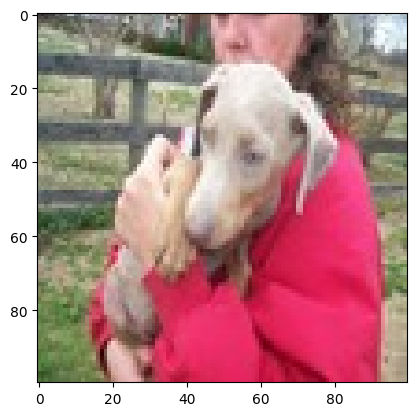

In [42]:
idx = random.randint(0, len(X_train)-1)
plt.imshow(X_train[idx])
plt.show()


In [43]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [45]:
if len(X_train) != len(Y_train):
    print(f"Warning: X_train (length {len(X_train)}) and Y_train (length {len(Y_train)}) have different lengths. Truncating Y_train to match X_train.")
    Y_train = Y_train[:len(X_train)]
if len(X_test) != len(Y_test):
    print(f"Warning: X_test (length {len(X_test)}) and Y_test (length {len(Y_test)}) have different lengths. Truncating Y_test to match X_test.")
    Y_test = Y_test[:len(X_test)]

model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, Y_test),
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2941 - loss: 0.8575 - val_accuracy: 1.0000 - val_loss: 0.0302
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step - accuracy: 1.0000 - loss: 3.1972e-04 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - accuracy: 1.0000 - loss: 8.3302e-06 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step - accuracy: 1.0000 - loss: 1.8756e-07 - val_accuracy: 1.0000 - val_loss: 6.6428e-04
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step - accuracy: 1.0000 - loss: 8.4946e-10 - val_accuracy: 1.0000 - val_loss: 2.6959e-04
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step - accuracy: 1.0000 - loss: 3.2259e-11 - val_accuracy: 1.0000 - val_loss: 1.1392e-04
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - accuracy: 1.0000 - loss: 1.3168e-10 - val_accuracy: 1.0000 - val_loss: 5.0225e-05
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step - accuracy: 1.0000 - loss: 3.25

In [46]:
model.evaluate(X_test, Y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 1.0000 - loss: 4.5856e-09


[4.585634094667057e-09, 1.0]

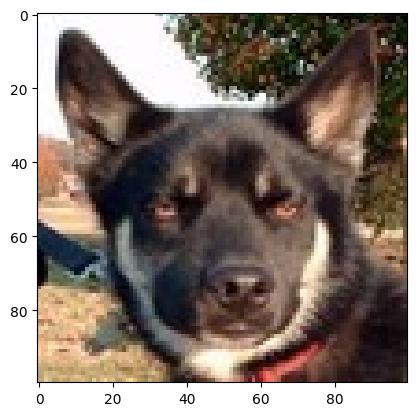

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


In [47]:
idx2 = random.randint(0, len(Y_test)-1)
plt.imshow(X_test[idx2])
plt.show()

y_pred = model.predict(X_test[idx2].reshape(1,100,100,3))
y_pred = y_pred > 0.5


In [48]:
model.save('model.h5')
print('our model is saved')


our model is saved
